In [78]:
from nltk.tokenize import word_tokenize
# from word2number import w2n
from nltk.corpus import stopwords
import pyarabic.araby as araby
import numpy as np
import pandas as pd
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import word2vec
from gensim.models import fasttext
from gensim.models import KeyedVectors
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from bidi.algorithm import get_display
import arabic_reshaper

# Part 2: Word Embeddings

In [79]:
import pymongo
# Connect to MongoDB
client = pymongo.MongoClient('localhost', 27017)
db = client['web_scraping']
collection = db['aljazeera_events']

# Fetch content from MongoDB
cursor = collection.find()
titles_list = []

In [80]:
count = 0
for document in cursor:
    if count >= 27:
        break  # Exit the loop if we've processed 6 contents
    title = document.get('title')
    titles_list.append(title)
    count += 1

In [81]:
print(titles_list)
print("the title:",title)


['مهرجان الجزيرة بلقان للأفلام الوثائقية', 'منتدى الجزيرة الخامس عشر', 'منتدى كليات الصحافة في العالم العربي', 'مهرجان الجزيرة بلقان السادس للأفلام الوثائقية', 'الجزيرة للدراسات يبحث جدوى انخراط فلسطينيّي الداخل في مؤسسة الحكم الإسرائيلية', 'معرض اكتشف الجزيرة', 'الجزيرة تحتفل بمرور 25 عاماً على انطلاقتها', 'منتدى الجزيرة 2019: الخليج بين الأزمة وتراجع التأثير الاستراتيجي', 'أربعون عاماً على الثورة الإسلامية في إيران', 'الاحتفال بالذكرى الثانية والعشرين لانطلاق شبكة الجزيرة الإعلامية', 'معهد الجزيرة ينظم منتدى للإعلام الرقمي بإسطنبول', 'وقفة تضامنية مع الصحفي جمال خاشقجي', 'نادي الصحافة القومي بواشنطن يستضيف الجزيرة', 'اختتام مهرجان الجزيرة بلقان للأفلام الوثائقية بسراييفو', 'مهرجان الجزيرة بلقان للأفلام الوثائقية', 'منتدى الجزيرة الخامس عشر', 'منتدى كليات الصحافة في العالم العربي', 'مهرجان الجزيرة بلقان السادس للأفلام الوثائقية', 'الجزيرة للدراسات يبحث جدوى انخراط فلسطينيّي الداخل في مؤسسة الحكم الإسرائيلية', 'معرض اكتشف الجزيرة', 'الجزيرة تحتفل بمرور 25 عاماً على انطلاقتها', 'منتدى ا

### Tokenizing text to sentences and words

In [82]:
corpus = [token for sentence in titles_list for token in araby.sentence_tokenize(sentence)]


print(f"Tokenized sentences: {corpus}")

Tokenized sentences: ['مهرجان الجزيرة بلقان للأفلام الوثائقية', 'منتدى الجزيرة الخامس عشر', 'منتدى كليات الصحافة في العالم العربي', 'مهرجان الجزيرة بلقان السادس للأفلام الوثائقية', 'الجزيرة للدراسات يبحث جدوى انخراط فلسطينيّي الداخل في مؤسسة الحكم الإسرائيلية', 'معرض اكتشف الجزيرة', 'الجزيرة تحتفل بمرور 25 عاماً على انطلاقتها', 'منتدى الجزيرة 2019:', 'الخليج بين الأزمة وتراجع التأثير الاستراتيجي', 'أربعون عاماً على الثورة الإسلامية في إيران', 'الاحتفال بالذكرى الثانية والعشرين لانطلاق شبكة الجزيرة الإعلامية', 'معهد الجزيرة ينظم منتدى للإعلام الرقمي بإسطنبول', 'وقفة تضامنية مع الصحفي جمال خاشقجي', 'نادي الصحافة القومي بواشنطن يستضيف الجزيرة', 'اختتام مهرجان الجزيرة بلقان للأفلام الوثائقية بسراييفو', 'مهرجان الجزيرة بلقان للأفلام الوثائقية', 'منتدى الجزيرة الخامس عشر', 'منتدى كليات الصحافة في العالم العربي', 'مهرجان الجزيرة بلقان السادس للأفلام الوثائقية', 'الجزيرة للدراسات يبحث جدوى انخراط فلسطينيّي الداخل في مؤسسة الحكم الإسرائيلية', 'معرض اكتشف الجزيرة', 'الجزيرة تحتفل بمرور 25 عاماً 

In [83]:
ar_punct = ''')(+`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”،.”…“–ـ”.'''
en_punct = string.punctuation
punct_lst = ar_punct + en_punct
unique_words = set()
for sentence in corpus:
    for word in araby.tokenize(sentence):
        if word not in stopwords.words('arabic') and word not in punct_lst and word.isdigit() == False:
            unique_words.add(word)
print(f"Unique words: {unique_words}")
print(f"Number of unique words: {len(unique_words)}")

Unique words: {'القومي', 'الإعلامية', 'الداخل', 'العالم', 'أربعون', 'مهرجان', 'جدوى', 'مؤسسة', 'تحتفل', 'وتراجع', 'بالذكرى', 'تضامنية', 'كليات', 'السادس', 'للأفلام', 'لانطلاق', 'بسراييفو', 'منتدى', 'الوثائقية', 'الثورة', 'الأزمة', 'الصحفي', 'الجزيرة', 'بمرور', 'للإعلام', 'بلقان', 'جمال', 'للدراسات', 'بإسطنبول', 'الصحافة', 'معهد', 'نادي', 'بواشنطن', 'إيران', 'الاستراتيجي', 'الاحتفال', 'الخليج', 'الثانية', 'شبكة', 'العربي', 'الرقمي', 'ينظم', 'الخامس', 'فلسطينيّي', 'والعشرين', 'معرض', 'انخراط', 'اكتشف', 'انطلاقتها', 'الإسلامية', 'وقفة', 'التأثير', 'الإسرائيلية', 'خاشقجي', 'اختتام', 'يبحث', 'عاماً', 'الحكم', 'يستضيف'}
Number of unique words: 59


In [84]:
one_hot_encoded = []
for word in unique_words:
    encoding = np.zeros(len(unique_words))
    
    index = list(unique_words).index(word)
    
    encoding[index] = 1
    one_hot_encoded.append((word, encoding))
    
df_onehot = pd.DataFrame(one_hot_encoded, columns=['Word', 'One-hot encoding'])
df_onehot

,Word,One-hot encoding
0,القومي,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,الإعلامية,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,الداخل,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,العالم,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,أربعون,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ..."
5,مهرجان,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
6,جدوى,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
7,مؤسسة,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ..."
8,تحتفل,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ..."
9,وتراجع,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [85]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
df_BoW = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names_out())
df_BoW.head()

,2019,25,أربعون,إيران,اختتام,اكتشف,الأزمة,الإسرائيلية,الإسلامية,الإعلامية,...,معهد,منتدى,مهرجان,نادي,والعشرين,وتراجع,وقفة,يبحث,يستضيف,ينظم
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [86]:
tr_idf_model  = TfidfVectorizer()
tf_idf_vector = tr_idf_model.fit_transform(corpus)
tf_idf_array = tf_idf_vector.toarray()
df_tf_idf = pd.DataFrame(tf_idf_array, columns = tr_idf_model.get_feature_names_out())
df_tf_idf.head()

,2019,25,أربعون,إيران,اختتام,اكتشف,الأزمة,الإسرائيلية,الإسلامية,الإعلامية,...,معهد,منتدى,مهرجان,نادي,والعشرين,وتراجع,وقفة,يبحث,يستضيف,ينظم
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.484952,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.413655,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.307412,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.413311,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.320914,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.320914,0.0,0.0


In [87]:
tokenized_corpus = []
for sentence in corpus:
    tokenized_sentence = [word for word in araby.tokenize(sentence) if (word not in stopwords.words('arabic')) and (word.isdigit() == False) and (word not in ['.', ',', '!', '?', ':', ';', '،', '؟', '؛'])]
    tokenized_corpus.append(tokenized_sentence)

In [88]:

cbow_w2v_model = word2vec.Word2Vec(tokenized_corpus, vector_size=100, window=30,
                            min_count=1, sample=1e-3, sg=0, epochs=1000)

In [89]:
similar_words = {search_term : [item[0] for item in cbow_w2v_model.wv.most_similar([search_term], topn=5)] for search_term in 
               cbow_w2v_model.wv.key_to_index}
similar_words

{'الجزيرة': ['مهرجان', 'الوثائقية', 'بلقان', 'للأفلام', 'اختتام'],
 'منتدى': ['للإعلام', 'بإسطنبول', 'ينظم', 'معهد', 'الرقمي'],
 'مهرجان': ['للأفلام', 'الوثائقية', 'بلقان', 'السادس', 'اختتام'],
 'بلقان': ['السادس', 'مهرجان', 'للأفلام', 'الوثائقية', 'اختتام'],
 'للأفلام': ['السادس', 'مهرجان', 'بلقان', 'اختتام', 'الوثائقية'],
 'الوثائقية': ['مهرجان', 'السادس', 'بلقان', 'للأفلام', 'بسراييفو'],
 'الصحافة': ['العالم', 'العربي', 'بواشنطن', 'يستضيف', 'كليات'],
 'عاماً': ['الثورة', 'إيران', 'الإسلامية', 'أربعون', 'تحتفل'],
 'الداخل': ['للدراسات', 'جدوى', 'انخراط', 'الإسرائيلية', 'مؤسسة'],
 'انطلاقتها': ['تحتفل', 'بمرور', 'عاماً', 'الثورة', 'إيران'],
 'بمرور': ['تحتفل', 'انطلاقتها', 'عاماً', 'الثورة', 'إيران'],
 'تحتفل': ['بمرور', 'انطلاقتها', 'عاماً', 'الثورة', 'إيران'],
 'اكتشف': ['معرض', 'الخامس', 'الجزيرة', 'فلسطينيّي', 'يبحث'],
 'معرض': ['اكتشف', 'الخامس', 'الجزيرة', 'فلسطينيّي', 'يبحث'],
 'الإسرائيلية': ['للدراسات', 'انخراط', 'مؤسسة', 'الحكم', 'جدوى'],
 'الحكم': ['الإسرائيلية', 'جدوى', 'ل

In [90]:
vec1 = cbow_w2v_model.wv.get_vector('الجزيرة')
vec2 = cbow_w2v_model.wv.get_vector('الحكم')
similarity = np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))
print(f"similarity between the two words `الحكم` and `الجزيرة` using the CBoW model is : {similarity}")

similarity between the two words `الحكم` and `الجزيرة` using the CBoW model is : 0.47309890389442444


In [91]:
sg_w2v_model = word2vec.Word2Vec(tokenized_corpus, vector_size=100, window=30,
                            min_count=1, sample=1e-3, sg=1, epochs=1000)

In [92]:
similar_words = {search_term : [item[0] for item in sg_w2v_model.wv.most_similar([search_term], topn=5)] for search_term in 
               sg_w2v_model.wv.key_to_index}
similar_words

{'الجزيرة': ['معرض', 'اكتشف', 'بالذكرى', 'الإعلامية', 'شبكة'],
 'منتدى': ['الخامس', 'بإسطنبول', 'للإعلام', 'ينظم', 'العربي'],
 'مهرجان': ['الوثائقية', 'للأفلام', 'بلقان', 'اختتام', 'بسراييفو'],
 'بلقان': ['للأفلام', 'السادس', 'اختتام', 'الوثائقية', 'بسراييفو'],
 'للأفلام': ['السادس', 'بلقان', 'اختتام', 'الوثائقية', 'مهرجان'],
 'الوثائقية': ['مهرجان', 'للأفلام', 'بسراييفو', 'بلقان', 'السادس'],
 'الصحافة': ['كليات', 'العالم', 'العربي', 'يستضيف', 'بواشنطن'],
 'عاماً': ['تحتفل', 'بمرور', 'انطلاقتها', 'أربعون', 'الإسلامية'],
 'الداخل': ['فلسطينيّي', 'للدراسات', 'الإسرائيلية', 'انخراط', 'مؤسسة'],
 'انطلاقتها': ['تحتفل', 'بمرور', 'عاماً', 'الإسلامية', 'أربعون'],
 'بمرور': ['تحتفل', 'انطلاقتها', 'عاماً', 'الإسلامية', 'أربعون'],
 'تحتفل': ['بمرور', 'انطلاقتها', 'عاماً', 'الإسلامية', 'أربعون'],
 'اكتشف': ['شبكة', 'معرض', 'الإعلامية', 'الثانية', 'بالذكرى'],
 'معرض': ['اكتشف', 'شبكة', 'الثانية', 'بالذكرى', 'الاحتفال'],
 'الإسرائيلية': ['للدراسات', 'فلسطينيّي', 'انخراط', 'مؤسسة', 'جدوى'],
 'الحكم':

In [93]:
vec1 = sg_w2v_model.wv.get_vector('الحكم')
vec2 = sg_w2v_model.wv.get_vector('الجزيرة')
similarity = np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))
print(f"similarity between the two words `الحكم` and `الجزيرة` using the Word2Vec Skip Gram model is : {similarity}")


similarity between the two words `الحكم` and `الجزيرة` using the Word2Vec Skip Gram model is : 0.5192559361457825


In [94]:
fasttext_model = fasttext.FastText(tokenized_corpus, vector_size=100, window=30,
                            min_count=1, sample=1e-3, sg=0, epochs=1000)

In [95]:
similar_words = {search_term : [item[0] for item in fasttext_model.wv.most_similar([search_term], topn=5)] for search_term in 
               fasttext_model.wv.key_to_index}
similar_words

{'الجزيرة': ['معرض', 'للأفلام', 'اختتام', 'بسراييفو', 'السادس'],
 'منتدى': ['الرقمي', 'بإسطنبول', 'معهد', 'ينظم', 'للإعلام'],
 'مهرجان': ['بلقان', 'اختتام', 'الوثائقية', 'بسراييفو', 'للأفلام'],
 'بلقان': ['مهرجان', 'اختتام', 'الوثائقية', 'بسراييفو', 'للأفلام'],
 'للأفلام': ['اختتام', 'مهرجان', 'بلقان', 'الوثائقية', 'بسراييفو'],
 'الوثائقية': ['بلقان', 'مهرجان', 'اختتام', 'السادس', 'بسراييفو'],
 'الصحافة': ['القومي', 'يستضيف', 'بواشنطن', 'نادي', 'كليات'],
 'عاماً': ['أربعون', 'إيران', 'الثورة', 'بمرور', 'تحتفل'],
 'الداخل': ['الحكم', 'مؤسسة', 'يبحث', 'انخراط', 'فلسطينيّي'],
 'انطلاقتها': ['تحتفل', 'الإسلامية', 'بمرور', 'الثورة', 'الإعلامية'],
 'بمرور': ['تحتفل', 'عاماً', 'الثورة', 'إيران', 'أربعون'],
 'تحتفل': ['بمرور', 'عاماً', 'انطلاقتها', 'الثورة', 'الإسلامية'],
 'اكتشف': ['معرض', 'الخامس', 'الجزيرة', 'بمرور', 'تحتفل'],
 'معرض': ['اكتشف', 'الخامس', 'الجزيرة', 'الرقمي', 'معهد'],
 'الإسرائيلية': ['انخراط', 'يبحث', 'مؤسسة', 'فلسطينيّي', 'جدوى'],
 'الحكم': ['الداخل', 'فلسطينيّي', 'يبحث',

In [96]:
vec1 = fasttext_model.wv.get_vector('الحكم')
vec2 = fasttext_model.wv.get_vector('الجزيرة')
similarity = np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))
print(f"similarity between the two words `الجزيرة` and `الجزيرة` using the FastText CBoW model is : {similarity}")

similarity between the two words `الجزيرة` and `الجزيرة` using the FastText CBoW model is : 0.5735452175140381


In [97]:
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

glove_input_file = './glove.6B.100d.txt'
word2vec_output_file = 'glove.6B.100d.word2vec.txt'
glove2word2vec(glove_input_file, word2vec_output_file)
glove_model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)
print("GloVe Vectors:\n", glove_model)


C:\Users\Dell PC\AppData\Local\Temp\ipykernel_14896\1950947711.py:6: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file, word2vec_output_file)


In [ ]:
vec1 = glove_model['الجزيرة']
vec2 = glove_model['الحكم']
similarity = np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))
print(f"similarity between the two words `الجزيرة` and `الحكم` using the pre-trained GloVe model is : {similarity}")

KeyError: "Key 'الجزيرة' not present"

In [ ]:
glove_vectors = []
glove_words = []
non = []
for word in unique_words:
    try:
        glove_vectors.append(glove_model[word])
        glove_words.append(word)
    except KeyError:
        print(f"{word} is not in the vocabulary")


الداخل is not in the vocabulary
العالم is not in the vocabulary
مهرجان is not in the vocabulary
جدوى is not in the vocabulary
مؤسسة is not in the vocabulary
تحتفل is not in the vocabulary
كليات is not in the vocabulary
السادس is not in the vocabulary
للأفلام is not in the vocabulary
منتدى is not in the vocabulary
الوثائقية is not in the vocabulary
الجزيرة is not in the vocabulary
بمرور is not in the vocabulary
بلقان is not in the vocabulary
للدراسات is not in the vocabulary
الصحافة is not in the vocabulary
العربي is not in the vocabulary
الخامس is not in the vocabulary
فلسطينيّي is not in the vocabulary
معرض is not in the vocabulary
انخراط is not in the vocabulary
اكتشف is not in the vocabulary
انطلاقتها is not in the vocabulary
الإسرائيلية is not in the vocabulary
يبحث is not in the vocabulary
عاماً is not in the vocabulary
الحكم is not in the vocabulary


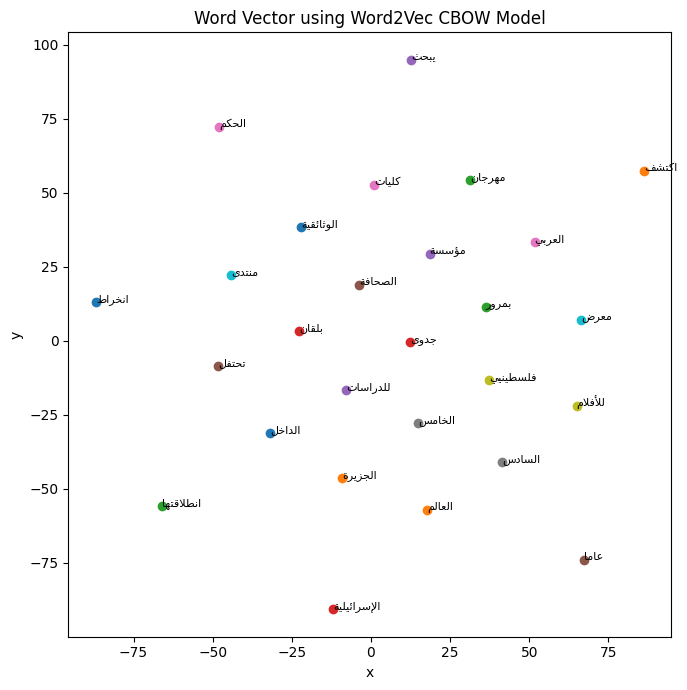

In [ ]:
words = df_onehot['Word']
vectors = np.asarray(df_onehot['One-hot encoding'].to_list())

tsne = TSNE(n_components=2, random_state=0, n_iter=5000, n_iter_without_progress=500, perplexity=6)
vectors_2d = tsne.fit_transform(vectors)

plt.figure(figsize=(7, 7))
for i, word in enumerate(words):
    xxword = arabic_reshaper.reshape(word) # support arabic letters
    xxartext = get_display(xxword)
    plt.scatter(vectors_2d[i][0], vectors_2d[i][1], marker='o')
    plt.annotate(xxartext, xy=(vectors_2d[i][0], vectors_2d[i][1]), fontsize=8)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Word Vector using Word2Vec CBOW Model')
plt.tight_layout()
plt.show()

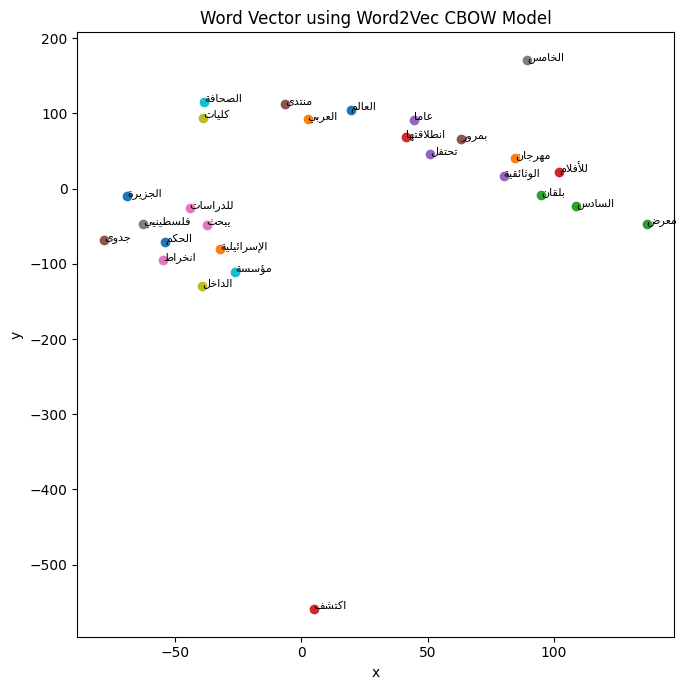

In [ ]:
words = list(cbow_w2v_model.wv.index_to_key)
vectors = cbow_w2v_model.wv.vectors

tsne = TSNE(n_components=2, random_state=0, n_iter=500, n_iter_without_progress=500, perplexity=6)
vectors_2d = tsne.fit_transform(vectors)

plt.figure(figsize=(7, 7))
for i, word in enumerate(words):
    xxword = arabic_reshaper.reshape(word) # support arabic letters
    xxartext = get_display(xxword)
    plt.scatter(vectors_2d[i][0], vectors_2d[i][1], marker='o')
    plt.annotate(xxartext, xy=(vectors_2d[i][0], vectors_2d[i][1]), fontsize=8)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Word Vector using Word2Vec CBOW Model')
plt.tight_layout()
plt.show()

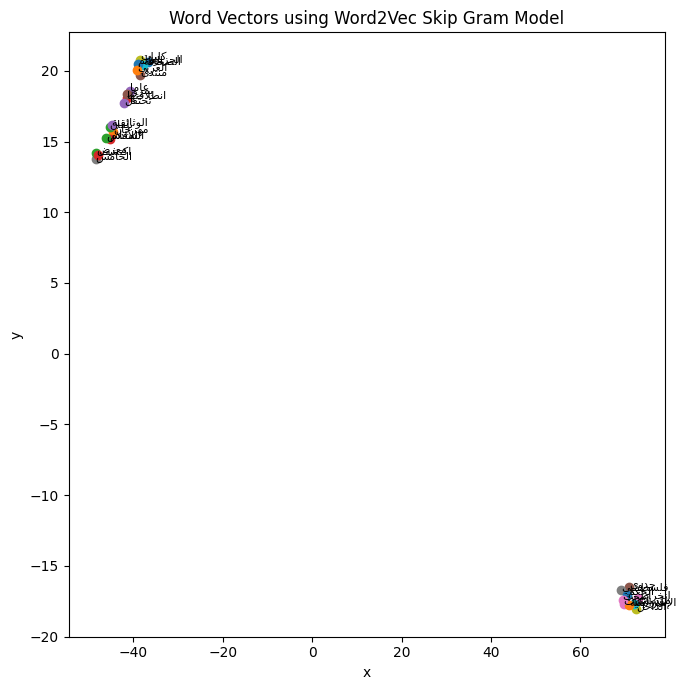

In [ ]:
words = list(sg_w2v_model.wv.index_to_key)
vectors = sg_w2v_model.wv.vectors

tsne = TSNE(n_components=2, random_state=0, n_iter=5000, n_iter_without_progress=500,perplexity=6)
vectors_2d = tsne.fit_transform(vectors)

plt.figure(figsize=(7, 7))
for i, word in enumerate(words):
    xxword = arabic_reshaper.reshape(word) # support arabic letters
    xxartext = get_display(xxword)
    plt.scatter(vectors_2d[i][0], vectors_2d[i][1], marker='o')
    plt.annotate(xxartext, xy=(vectors_2d[i][0], vectors_2d[i][1]), fontsize=8)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Word Vectors using Word2Vec Skip Gram Model')
plt.tight_layout()
plt.show()

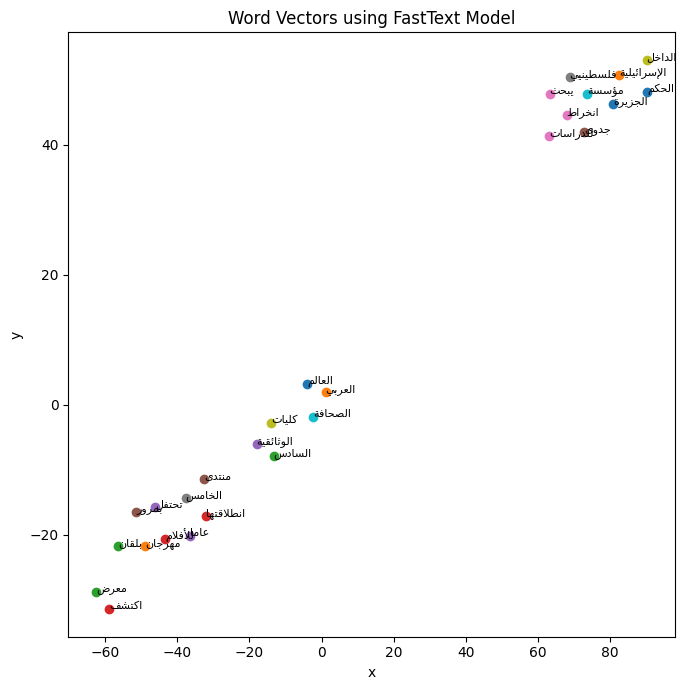

In [ ]:
words = list(fasttext_model.wv.index_to_key)
vectors = fasttext_model.wv.vectors

tsne = TSNE(n_components=2, random_state=0, n_iter=5000, n_iter_without_progress=500, perplexity=6)
vectors_2d = tsne.fit_transform(vectors)

plt.figure(figsize=(7, 7))
for i, word in enumerate(words):
    xxword = arabic_reshaper.reshape(word) # support arabic letters
    xxartext = get_display(xxword)
    plt.scatter(vectors_2d[i][0], vectors_2d[i][1], marker='o')
    plt.annotate(xxartext, xy=(vectors_2d[i][0], vectors_2d[i][1]), fontsize=8)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Word Vectors using FastText Model')
plt.tight_layout()
plt.show()

In [ ]:
tsne = TSNE(n_components=2, random_state=0, n_iter=5000, n_iter_without_progress=500, perplexity=2)
vectors_2d = tsne.fit_transform(np.asarray(glove_vectors))

plt.figure(figsize=(7, 7))
for i, word in enumerate(glove_words):
    xxword = arabic_reshaper.reshape(word) # to support arabic letters
    xxartext = get_display(xxword)
    plt.scatter(vectors_2d[i][0], vectors_2d[i][1], marker='o')
    plt.annotate(xxartext, xy=(vectors_2d[i][0], vectors_2d[i][1]), fontsize=8)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Word Vectors using the pretrained Arabic GloVe Model')
plt.tight_layout()
plt.show()

ValueError: perplexity must be less than n_samples